In [55]:
import pandas as pd

In [56]:
# Loading data using pandas library
data = pd.read_csv('turboaz.csv')

# Extracting required 3 columns 
data = data[["Yurush", "Buraxilish ili", "Qiymet"]]

# Converting Yurush from string format to number format by removing km and performing conversion
data['Yurush'] = data['Yurush'].str.replace(' km', '').str.replace(' ', '').astype(float)

# Preparing Qiymet column for conversion which includes removing 'AZN', removing commas
data['Qiymet'] = data['Qiymet'].str.replace(' AZN', '').str.replace(',', '')

# Converting to float data type and applying exchange rate if dollar sign is present
def currency_conversion(value):
    if '$' in value:
        return float(value.replace('$', '')) * 1.7  # 1.7 is the exchange rate from manat to dollar
    else:
        return float(value)

data['Qiymet'] = data['Qiymet'].apply(currency_conversion)

# Displaying the rows
data

,Yurush,Buraxilish ili,Qiymet
0,366000.0,1999,12500.0
1,102000.0,2014,53550.0
2,469700.0,2002,11700.0
3,556680.0,1998,9700.0
4,300000.0,2000,12700.0
...,...,...,...
1323,325000.0,1996,8800.0
1324,280000.0,1994,6300.0
1325,272000.0,1998,10900.0
1326,207000.0,2000,11300.0


In [57]:
# Renaming columns for the convenient work with the instructions
data.columns = ["X1", "X2", "Y"]
data

,X1,X2,Y
0,366000.0,1999,12500.0
1,102000.0,2014,53550.0
2,469700.0,2002,11700.0
3,556680.0,1998,9700.0
4,300000.0,2000,12700.0
...,...,...,...
1323,325000.0,1996,8800.0
1324,280000.0,1994,6300.0
1325,272000.0,1998,10900.0
1326,207000.0,2000,11300.0


In [58]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

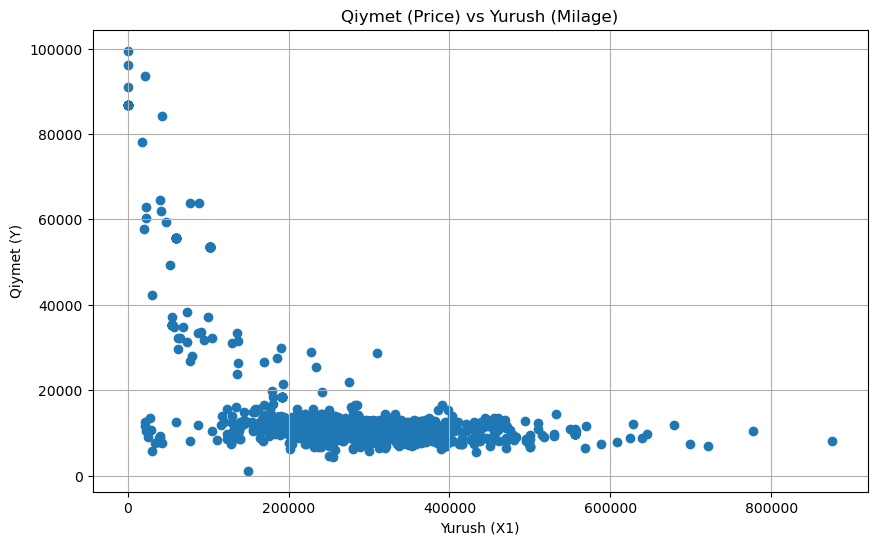

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(data['X1'], data['Y'])
plt.title('Qiymet (Price) vs Yurush (Milage)')
plt.xlabel('Yurush (X1)')
plt.ylabel('Qiymet (Y)')
plt.grid(True)
plt.show()

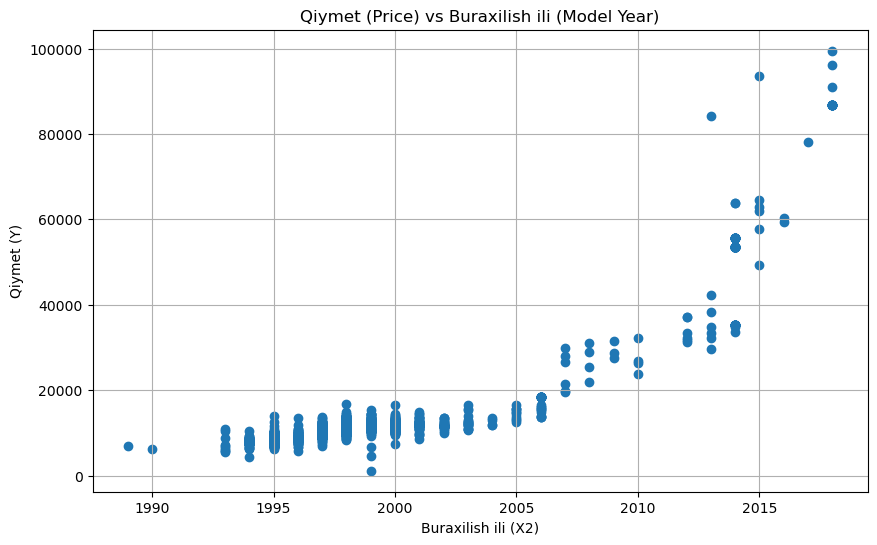

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(data['X2'], data['Y'])
plt.title('Qiymet (Price) vs Buraxilish ili (Model Year)')
plt.xlabel('Buraxilish ili (X2)')
plt.ylabel('Qiymet (Y)')
plt.grid(True)
plt.show()

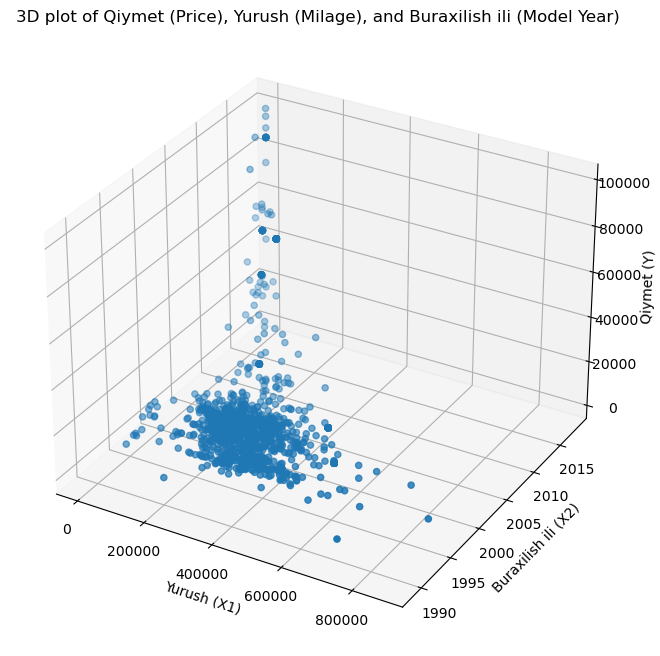

In [61]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['X1'], data['X2'], data['Y'])
ax.set_title('3D plot of Qiymet (Price), Yurush (Milage), and Buraxilish ili (Model Year)')
ax.set_xlabel('Yurush (X1)')
ax.set_ylabel('Buraxilish ili (X2)')
ax.set_zlabel('Qiymet (Y)')
plt.show()

In [62]:
import numpy as np

In [63]:
# Function for computing the cost
def compute_cost(x, y, w):
    # Calculating cost for given x and y
    m = len(y)
    predictions = np.dot(x, w)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [64]:
def mean(x):
    # Computing mean
    mean = np.mean(x, axis=0)
    return mean

def standard_deviation(x, mean):
    # Computing standard deviation
    variance = np.mean((x - mean) ** 2, axis=0)
    standard_deviation = np.sqrt(variance)
    return standard_deviation

def z_score_normalization(X):
    # Normalizing the feature vector using Z-score normalization
    mu = mean(X)
    sigma = standard_deviation(X, mu)
    normalized_feature = (X - mu) / (sigma)
    return normalized_feature, mu, sigma 

In [65]:
# Performing gradient descent to learn theta values
def gradient_descent(X, y, alpha, num_iters):
    normalized_feature, mu, sigma =  z_score_normalization(X.values)
    
    # Initially, X is a feature matrix without the bias term
    # Adding bias term to the feature matrix 
    normalized_X_with_bias = np.column_stack((np.ones(normalized_feature.shape[0]), normalized_feature))

    # Using random() function for the starting initialization of the theta parameters 
    theta = np.random.randn(normalized_X_with_bias.shape[1])

    m = len(y)  # Number of training examples
    cost_history = []  # A list for storing the cost at each iteration

    for i in range(num_iters):
        # Computing the predictions (hypothesis)
        predictions = np.dot(normalized_X_with_bias, theta)

        # Computing the error (loss)
        error = predictions - y.values

        # Computing the gradient
        gradient = np.dot(normalized_X_with_bias.T, error) / m

        # Updating the weights which are theta values
        theta = theta - alpha * gradient

        # Saving the cost for this iteration
        cost_history.append(compute_cost(normalized_X_with_bias, y.values, theta))
        
        # If the cost does not change significantly, break out early
        if i > 0 and abs(cost_history[i] - cost_history[i-1]) < 1e-10:
            break
    
    return theta, cost_history, mu, sigma


In [66]:
X = data[['X1', 'X2']]
y = data['Y']

theta, cost_history, mu, sigma = gradient_descent(X, y, 0.001, 10000)
print(theta) # Printing thetas for checking purposes 

[15115.77166436 -1342.28919689 11268.82834729]


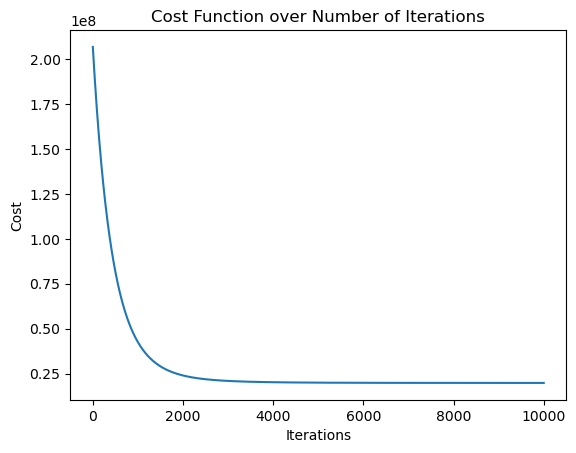

In [67]:
plt.title('Cost Function over Number of Iterations')
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [68]:
def predict(X, theta, mu, sigma):
    normalized_feature = (X - mu) / sigma
    normalized_X_with_bias = np.column_stack((np.ones(normalized_feature.shape[0]), normalized_feature))
    predictions = np.dot(normalized_X_with_bias, theta)
    return predictions

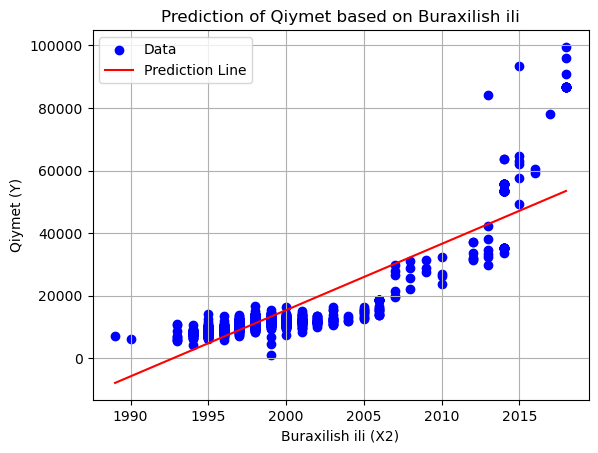

In [69]:
# Generating an array of 100 evenly spaced values between the minimum and maximum of 'Buraxilish ili' (X2) from the dataset
buraxilish_ili_range = np.linspace(data['X2'].min(), data['X2'].max(), 100)

# Creating a DataFrame for making predictions
features_for_prediction = pd.DataFrame({
    'X1': np.full_like(buraxilish_ili_range, data['X1'].mean()),
    'X2': buraxilish_ili_range
})

# Getting predictions for the generated range of 'Buraxilish ili' (X2)
buraxilish_ili_predictions = predict(features_for_prediction, theta, mu, sigma)

# Plotting the original data points and the prediction line
plt.scatter(data['X2'], data['Y'], label='Data', color='blue')  # Plotting the actual data points
plt.plot(buraxilish_ili_range, buraxilish_ili_predictions, color='red', label='Prediction Line')  # Plotting the prediction line

plt.xlabel('Buraxilish ili (X2)')
plt.ylabel('Qiymet (Y)')
plt.title('Prediction of Qiymet based on Buraxilish ili')
plt.legend()
plt.grid(True)
plt.show()

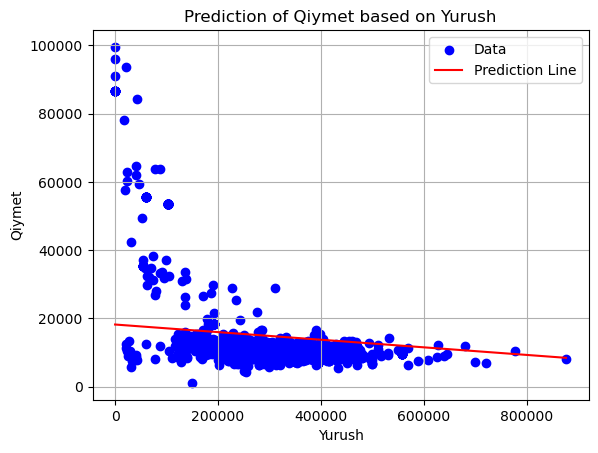

In [70]:
# Generating an array of 100 evenly spaced values between the minimum and maximum of 'Yurush' (X1) from the dataset
yurush_range = np.linspace(data['X1'].min(), data['X1'].max(), 100)

# Creating a DataFrame for making predictions
features_for_prediction = pd.DataFrame({
    'X1': yurush_range,
    'X2': np.full_like(yurush_range, data['X2'].mean())
})

# Getting predictions for the generated range
yurush_predictions = predict(features_for_prediction, theta, mu, sigma)

plt.scatter(data['X1'], data['Y'], label='Data', color='blue')
plt.plot(yurush_range, yurush_predictions, color='red', label='Prediction Line')

plt.xlabel('Yurush')
plt.ylabel('Qiymet')
plt.title('Prediction of Qiymet based on Yurush')
plt.legend()
plt.grid(True)
plt.show()

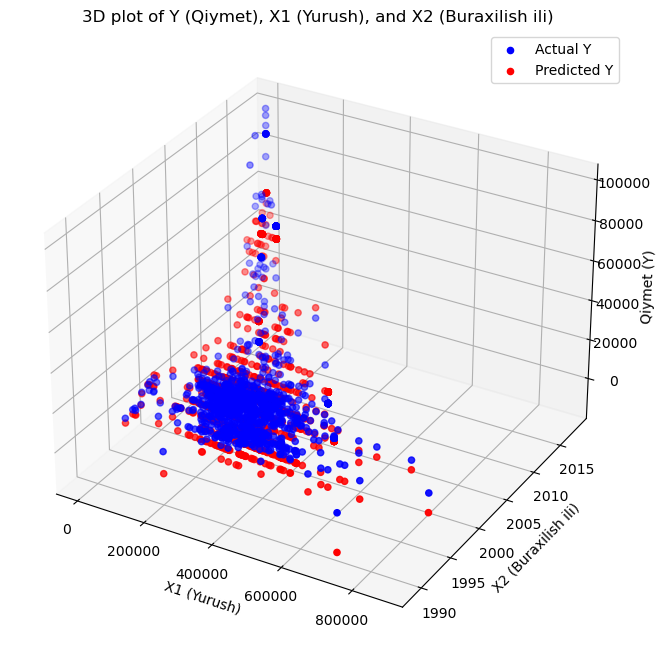

In [71]:
# Normalizing the features X1 (Yurush) and X2 (Buraxilish ili)
X1_normalized = (data['X1'] - mu[0]) / sigma[0]
X2_normalized = (data['X2'] - mu[1]) / sigma[1]

# Adding a bias term (column of ones) to the normalized features
X_normalized_with_bias = np.column_stack((np.ones(len(X1_normalized)), X1_normalized, X2_normalized))

# Making predictions using the learned weights (thetas)
predictions = X_normalized_with_bias.dot(theta)

# Creating a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for actual values
ax.scatter(data['X1'], data['X2'], data['Y'], color='blue', label='Actual Y')

# Scatter plot for predicted values
ax.scatter(data['X1'], data['X2'], predictions, color='red', label='Predicted Y')

# Setting labels and title
ax.set_xlabel('X1 (Yurush)')
ax.set_ylabel('X2 (Buraxilish ili)')
ax.set_zlabel('Qiymet (Y)')
ax.set_title('3D plot of Y (Qiymet), X1 (Yurush), and X2 (Buraxilish ili)')

# Legend
ax.legend()

# Show plot
plt.show()


In [72]:
# Defining the test data
test_data = pd.DataFrame(
    {"X1": [240000, 415558],  # Yurush
    "X2": [2000, 1996],       # Buraxilish ili
    "Y": [11500, 8800]}       # Qiymet
)

# Getting the values of features
X = test_data[['X1', 'X2']].values

manual_result = test_data
# Predicting the prices of the cars from test data 
manual_result['LR from Scratch'] = predict(X, theta, mu, sigma)
manual_result



,X1,X2,Y,LR from Scratch
0,240000,2000,11500,15840.687334
1,415558,1996,8800,5425.473521


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X = test_data[['X1', 'X2']].values
y = test_data['Y']

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the features and transform
X_scaled = scaler.fit_transform(X)

# Creating a linear regression model instance
model = LinearRegression()

# Fitting the model on the scaled features
model.fit(X_scaled, y)

X = test_data[['X1', 'X2']]

library_result = test_data
library_result['LR with Library'] = model.predict(X)
library_result


c:\Users\aze\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,X1,X2,Y,LR from Scratch,LR with Library
0,240000,2000,11500,15840.687334,-160639850.0
1,415558,1996,8800,5425.473521,-279144200.0
